In [1]:
import json
import pprint

print(10)

10


In [4]:
import os

def list_files_and_folders(directory):
    # Получаем список всех элементов в указанной директории
    all_items = os.listdir(directory)
    # Разделяем элементы на папки и файлы
    folders = [item for item in all_items if os.path.isdir(os.path.join(directory, item))]
    files = [item for item in all_items if os.path.isfile(os.path.join(directory, item))]

    return folders, files

# Замените 'vake' на путь к вашей папке
directory_path = 'vake'

folders, files = list_files_and_folders(directory_path)

print("Папки:",folders)
for papka in folders:
    print(f"Файлы внутри {papka}: {list_files_and_folders(f'{directory_path}/{papka}')[1]}")

print("\nФайлы:",files)


Папки: ['-28905875']
Файлы внутри -28905875: ['32946678.json', '32951148.json', '32951242.json', '32951327.json', '32951485.json', '32951753.json', '32951860.json', '32952014.json', '32952169.json', '32952307.json', '32952464.json', '32952600.json', '32952698.json', '32952790.json', '32952871.json', '32952965.json', '32953083.json', '32953196.json', '32953287.json', '32953403.json', '32953517.json', '32953609.json', '32954311.json', '32954349.json', '32954418.json', '32954477.json', '32954607.json', '32954656.json', '32954747.json', '32954824.json', '32954875.json', '32954975.json', '32955059.json', '32955246.json', '32955342.json', '32955444.json', '32955532.json', '32955602.json', '32955674.json', '32955788.json', '32955862.json', '32955943.json', '32955977.json', '32956035.json', '32956126.json', '32956215.json', '32956325.json', '32956411.json', '32956576.json', '32956627.json', '32956709.json', '32956790.json', '32956969.json', '32957209.json', '32957358.json', '32957496.json', '3

In [5]:
big_nd={}

x="vake/-28905875/"
for j_name in list_files_and_folders("vake/-28905875")[1]:
    with open(x+j_name,'r') as fl:

        jsn=json.load(fl)
        #pprint.pp(jsn)
        arra=[el['id'] for el in jsn['likes']]
        big_nd[jsn['id']]=arra

with open("dct_likes.json","w") as fc:
    fc.write(json.dumps(big_nd))


In [6]:
ks=list(big_nd.keys())
print(ks[10:])
for i,kk in enumerate(ks):

    for j,ss in enumerate(ks[i+1:]):
        print(len(set(big_nd[kk])&set(big_nd[ss])))

[32952464, 32952600, 32952698, 32952790, 32952871, 32952965, 32953083, 32953196, 32953287, 32953403, 32953517, 32953609, 32954311, 32954349, 32954418, 32954477, 32954607, 32954656, 32954747, 32954824, 32954875, 32954975, 32955059, 32955246, 32955342, 32955444, 32955532, 32955602, 32955674, 32955788, 32955862, 32955943, 32955977, 32956035, 32956126, 32956215, 32956325, 32956411, 32956576, 32956627, 32956709, 32956790, 32956969, 32957209, 32957358, 32957496, 32957552, 32957631, 32957748, 32957824, 32957921, 32957994, 32958056, 32958116, 32958169]
119
132
31
128
117
152
136
40
226
217
134
118
158
53
147
157
103
221
136
144
126
18
117
116
113
99
151
94
231
103
106
138
140
122
118
30
133
195
82
145
115
139
114
120
99
134
105
97
28
85
118
117
26
99
81
89
27
100
65
113
69
47
51
69
430
33
368
303
433
375
43
596
118
346
262
439
66
338
320
251
426
287
319
244
16
302
229
237
173
347
135
100
162
243
299
312
255
285
20
258
446
162
309
194
306
250
229
243
257
233
185
19
178
300
298
16
209
158
243
20

In [7]:
x=1
a=2

print((a,x)==(x,a))

False


In [18]:
import matplotlib.pyplot as plt
import networkx
import scipy

ValueError: too many values to unpack (expected 2)

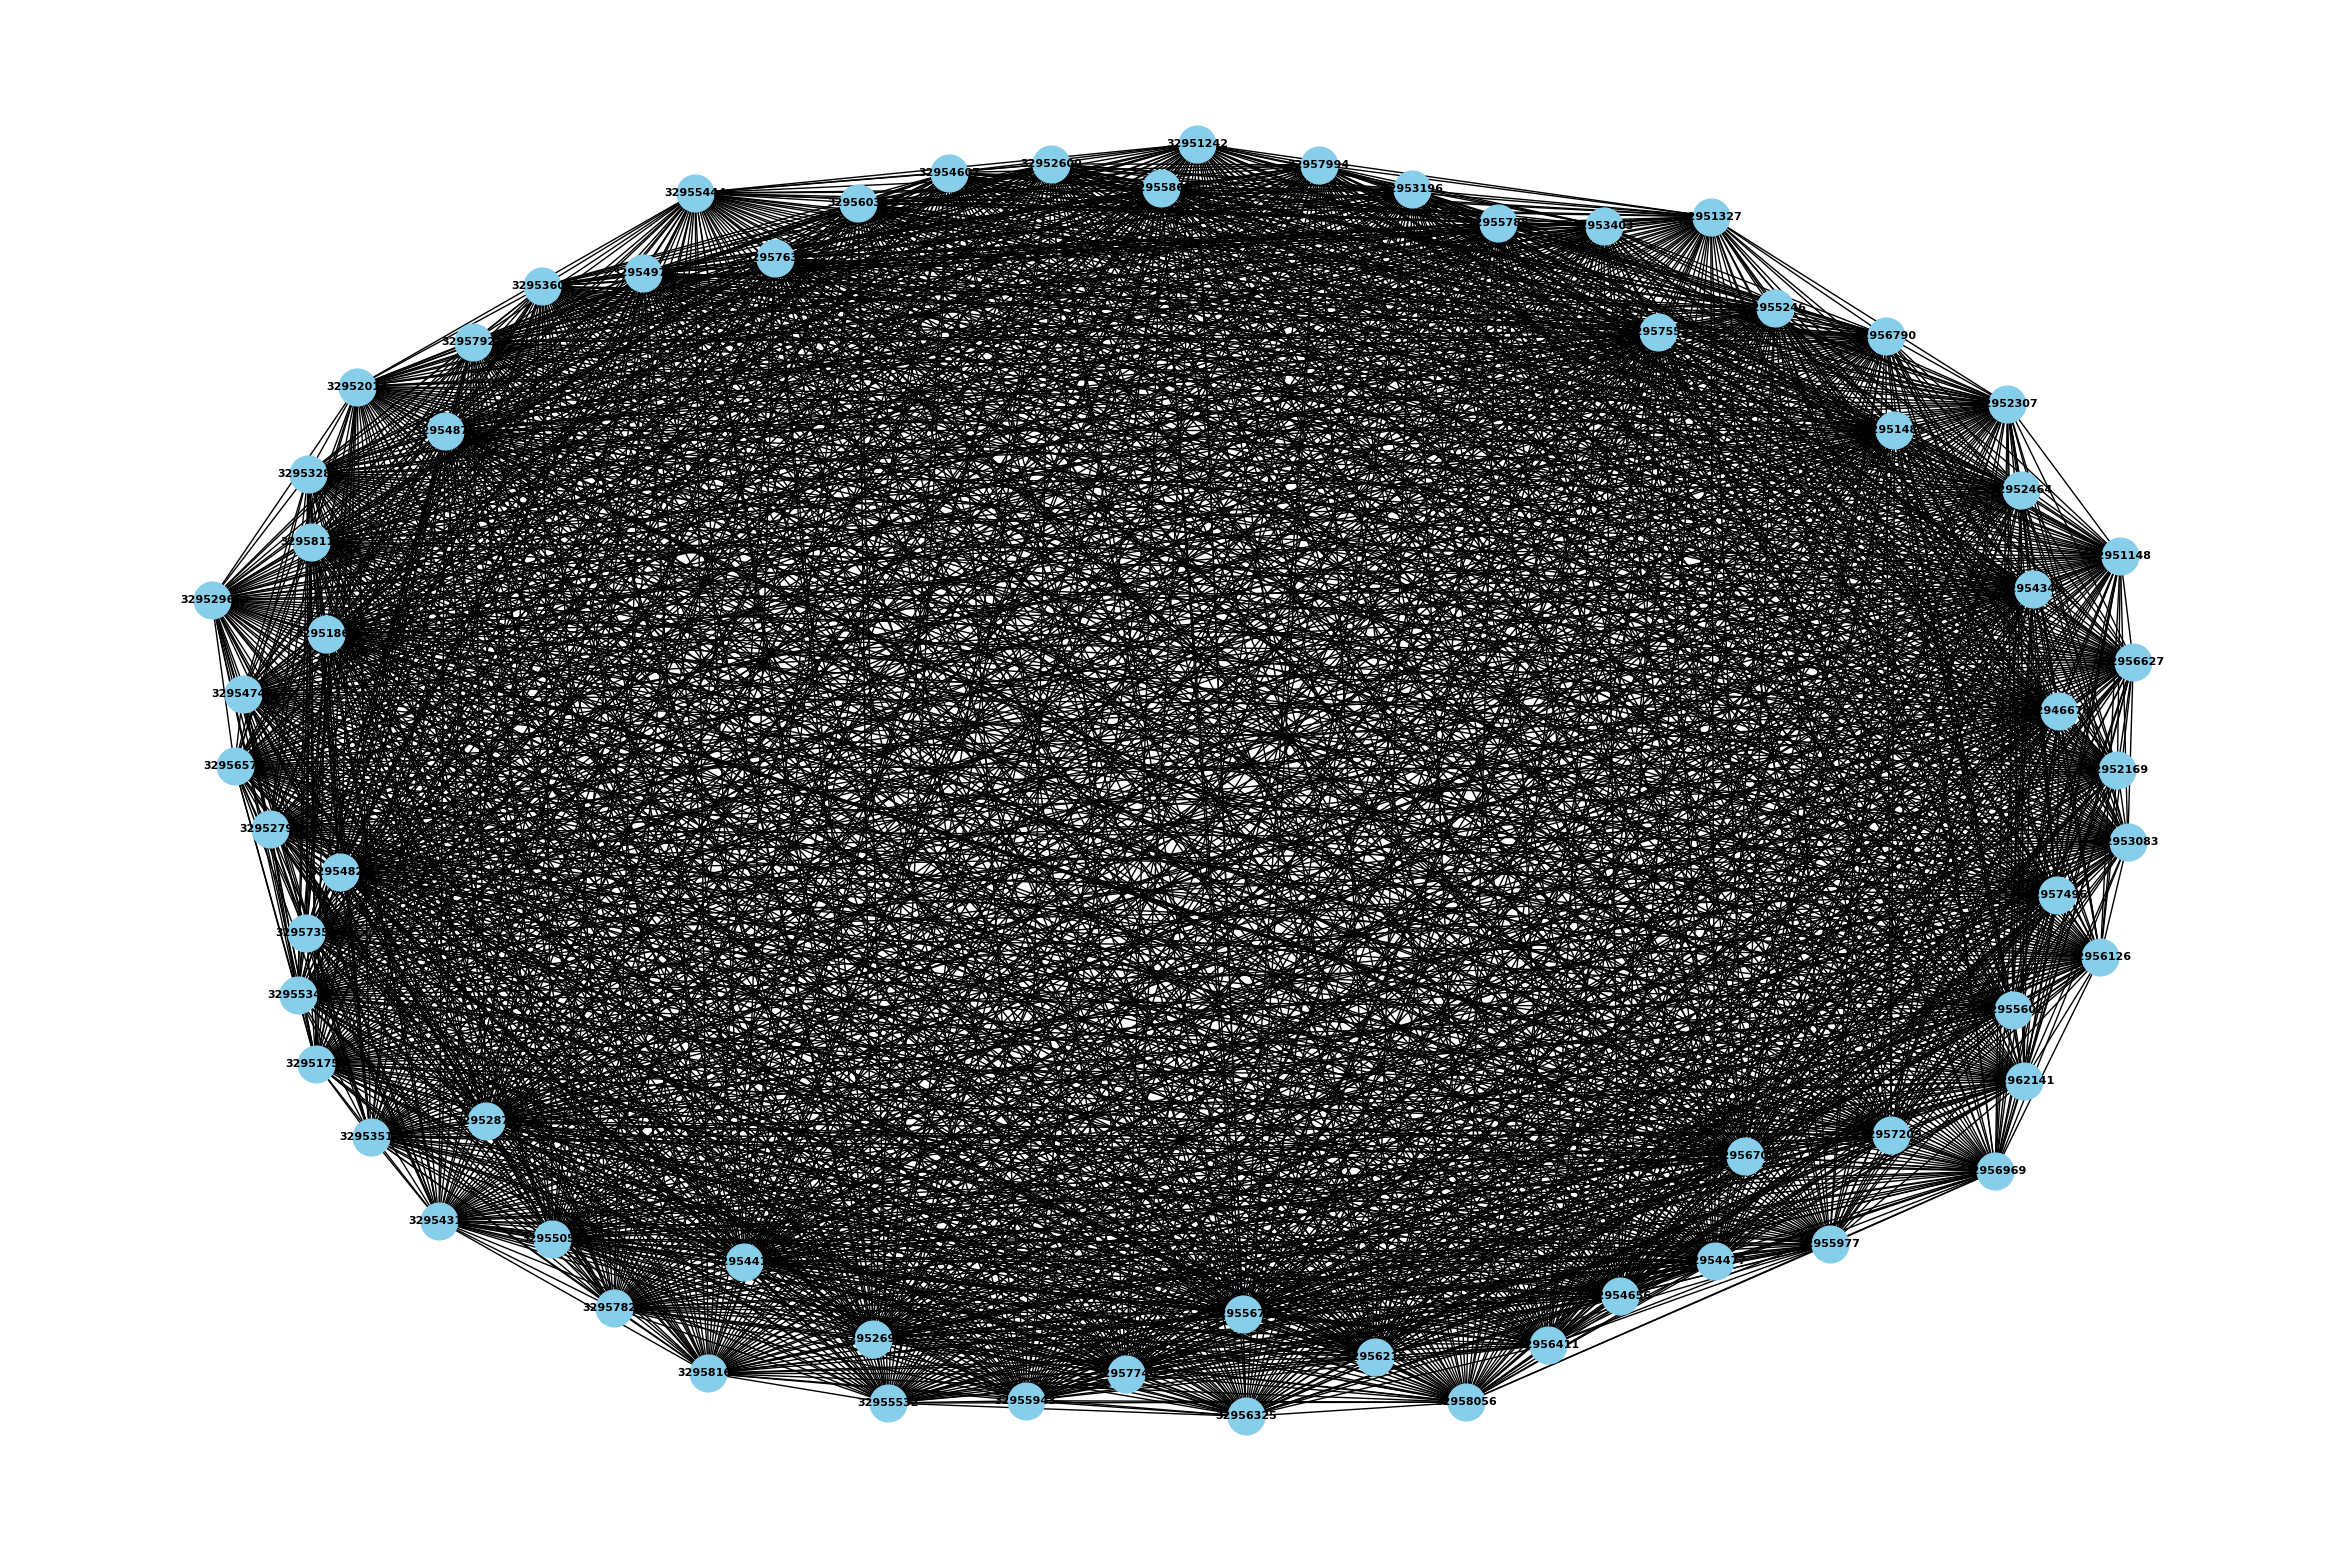

In [21]:

big_nd2 = {}

x = "vake/-28905875/"
for j_name in list_files_and_folders("vake/-28905875")[1]:
    with open(x + j_name, 'r') as fl:
        jsn = json.load(fl)
        #pprint.pp(jsn)
        arra2 = [el['id'] for el in jsn['comments']]
        big_nd2[jsn['id']] = arra2

import networkx as nx
import matplotlib.pyplot as plt

# Ваш словарь с айди постов и айди пользователей
your_dict = big_nd2
# Создаем граф
G = nx.Graph()

# Собираем информацию о ребрах между постами и весах
edge_data = {}

for post_id1, user_ids1 in your_dict.items():
    for post_id2, user_ids2 in your_dict.items():
        if post_id1 != post_id2:
            common_likes = set(user_ids1).intersection(user_ids2)
            weight = len(common_likes)

            # Если ребро уже существует, увеличиваем вес
            if (post_id1, post_id2) in edge_data:
                edge_data[(post_id1, post_id2)]['weight'] += weight
            else:
                # Создаем новое ребро
                edge_data[(post_id1, post_id2)] = {'weight': weight}

# Добавляем ребра и атрибуты к графу
for edge, data in edge_data.items():
    G.add_edge(edge[0], edge[1], **data)

# Определяем позиции узлов для отображения графа
pos = nx.spring_layout(G)
# Изменяем размер графика
fig, ax = plt.subplots(figsize=(30, 20))

# Рисуем граф
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=700, font_size=8)

# Добавляем веса ребрам в метки
edge_labels = {(edge[0], edge[1]): data['weight'] for edge, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Отображаем граф
plt.show()

In [17]:
print(list(G.__iter__()))

[32946678, 32951148, 32951242, 32951327, 32951485, 32951753, 32951860, 32952014, 32952169, 32952307, 32952464, 32952600, 32952698, 32952790, 32952871, 32952965, 32953083, 32953196, 32953287, 32953403, 32953517, 32953609, 32954311, 32954349, 32954418, 32954477, 32954607, 32954656, 32954747, 32954824, 32954875, 32954975, 32955059, 32955246, 32955342, 32955444, 32955532, 32955602, 32955674, 32955788, 32955862, 32955943, 32955977, 32956035, 32956126, 32956215, 32956325, 32956411, 32956576, 32956627, 32956709, 32956790, 32956969, 32957209, 32957358, 32957496, 32957552, 32957631, 32957748, 32957824, 32957921, 32957994, 32958056, 32958116, 32958169]


ValueError: too many values to unpack (expected 2)

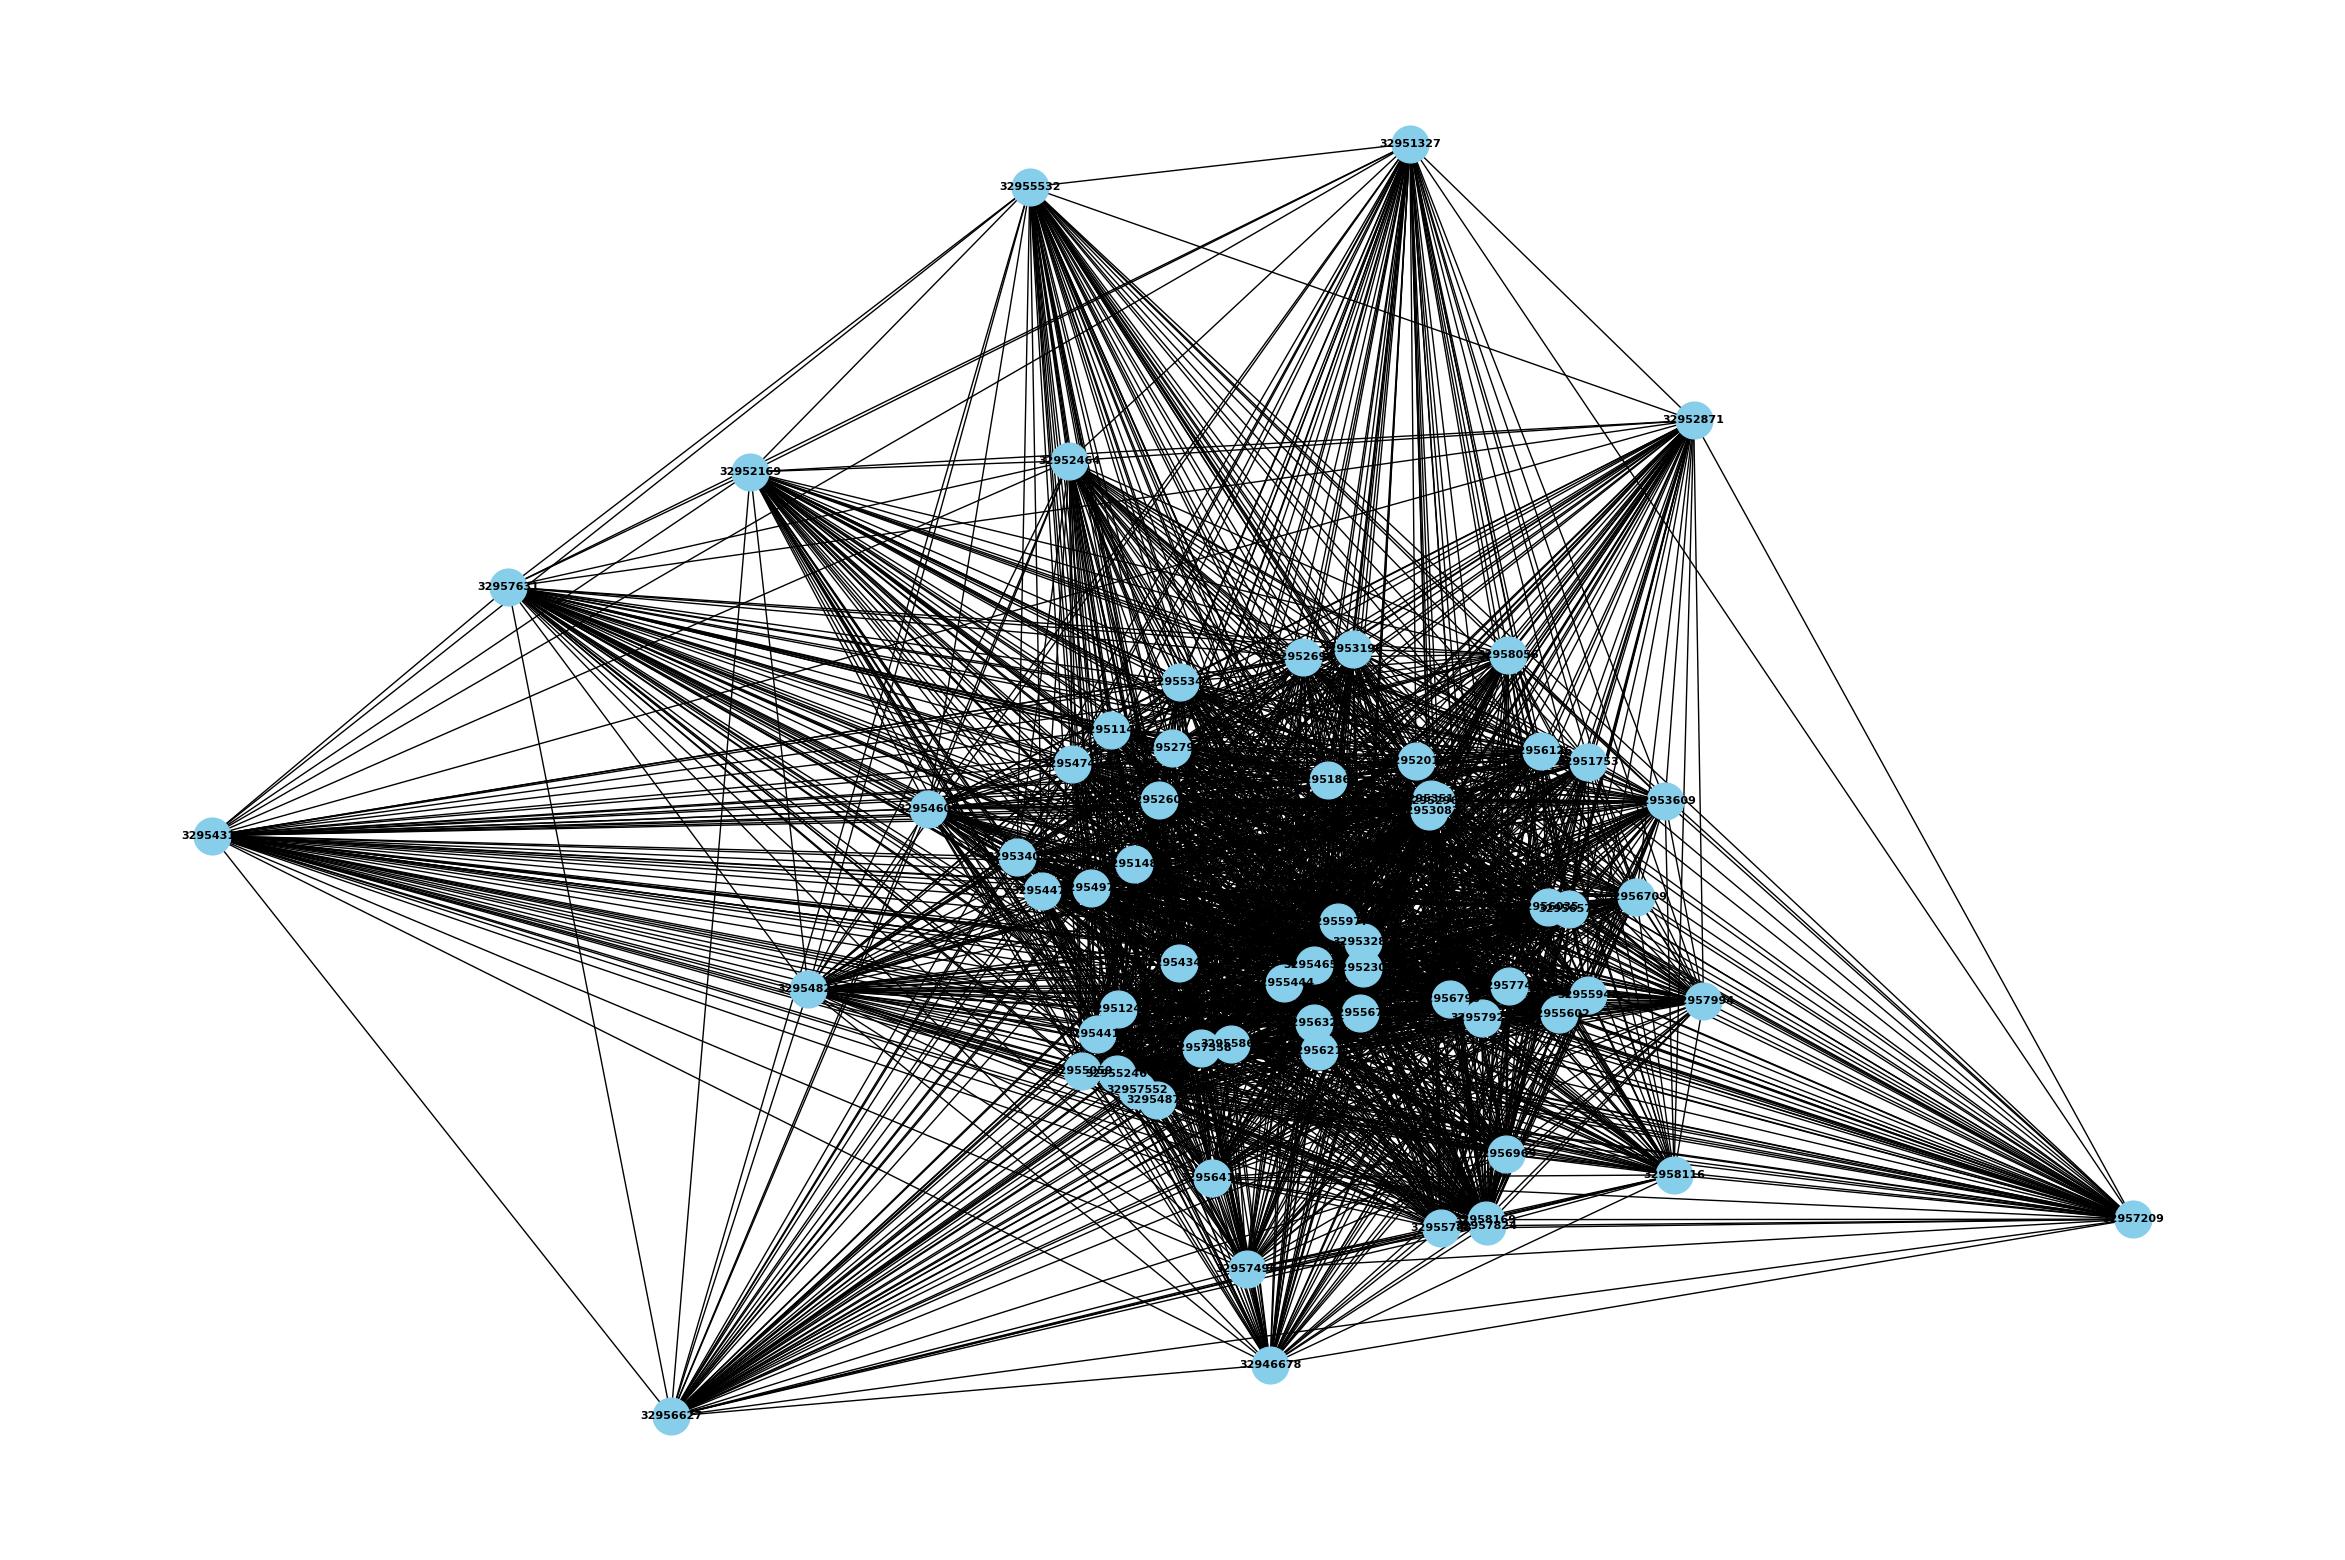

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Ваш словарь с айди постов и айди пользователей
your_dict = big_nd
# Создаем граф
G = nx.Graph()

# Собираем информацию о ребрах между постами и весах
edge_data = {}

for post_id1, user_ids1 in your_dict.items():
    for post_id2, user_ids2 in your_dict.items():
        if post_id1 != post_id2:
            common_likes = set(user_ids1).intersection(user_ids2)
            weight = len(common_likes)

            # Если ребро уже существует, увеличиваем вес
            if (post_id1, post_id2) in edge_data:
                edge_data[(post_id1, post_id2)]['weight'] += weight
            else:
                # Создаем новое ребро
                edge_data[(post_id1, post_id2)] = {'weight': weight}

# Добавляем ребра и атрибуты к графу
for edge, data in edge_data.items():
    G.add_edge(edge[0], edge[1], **data)

# Определяем позиции узлов для отображения графа
pos = nx.spring_layout(G)
# Изменяем размер графика
fig, ax = plt.subplots(figsize=(30, 20))

# Рисуем граф
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=700, font_size=8)

# Добавляем веса ребрам в метки
edge_labels = {(edge[0], edge[1]): data['weight'] for edge, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Отображаем граф
plt.show()

In [58]:
likes_comments_stat={}
for j_name in list_files_and_folders("vake/-28905875")[1]:
    with open(x + j_name, 'r') as fl:
        jsn = json.load(fl)
        #pprint.pp(jsn)
        likes_comments_stat[j_name.split('.')[0]]={"likes":len(jsn['likes']),"comments":len(jsn["comments"])}
#print(sorted(likes_comments_stat,key=lambda x:likes_comments_stat[x]['likes']))
#likes_comments_stat

['32954311', '32941278', '32950461', '32955532', '32956627', '32951327', '32957209', '32952169', '32957631', '32946709', '32946571', '32946507', '32952871', '32946579', '32960714', '32940634', '32946743', '32946616', '32946447', '32946562', '32946466', '32946605', '32946635', '32946500', '32946461', '32946546', '32946686', '32946529', '32954747', '32946699', '32954824', '32960644', '32946766', '32946420', '32941080', '32941196', '32940846', '32947181', '32962016', '32961589', '32948342', '32944162', '32946401', '32954607', '32953609', '32961168', '32950057', '32954418', '32952464', '32955788', '32940636', '32960859', '32944650', '32959815', '32940439', '32945898', '32940999', '32956709', '32940228', '32948181', '32949752', '32950825', '32952698', '32956411', '32961025', '32950916', '32948910', '32937760', '32959428', '32943600', '32961314', '32961492', '32951753', '32941506', '32959740', '32937664', '32951148', '32951242', '32950729', '32956576', '32961796', '32944788', '32959681', '32

{'32937664': {'likes': 2209, 'comments': 29},
 '32937760': {'likes': 2031, 'comments': 94},
 '32937878': {'likes': 5789, 'comments': 116},
 '32938082': {'likes': 4503, 'comments': 40},
 '32938203': {'likes': 5276, 'comments': 118},
 '32938289': {'likes': 3350, 'comments': 51},
 '32938972': {'likes': 2412, 'comments': 30},
 '32939019': {'likes': 14259, 'comments': 257},
 '32939197': {'likes': 3000, 'comments': 31},
 '32939375': {'likes': 7264, 'comments': 117},
 '32939477': {'likes': 11983, 'comments': 202},
 '32939577': {'likes': 19828, 'comments': 89},
 '32940064': {'likes': 3000, 'comments': 51},
 '32940228': {'likes': 2000, 'comments': 37},
 '32940439': {'likes': 1915, 'comments': 41},
 '32940482': {'likes': 12074, 'comments': 207},
 '32940634': {'likes': 297, 'comments': 11},
 '32940636': {'likes': 1871, 'comments': 78},
 '32940816': {'likes': 2555, 'comments': 94},
 '32940846': {'likes': 1492, 'comments': 40},
 '32940999': {'likes': 1947, 'comments': 91},
 '32941080': {'likes': 14

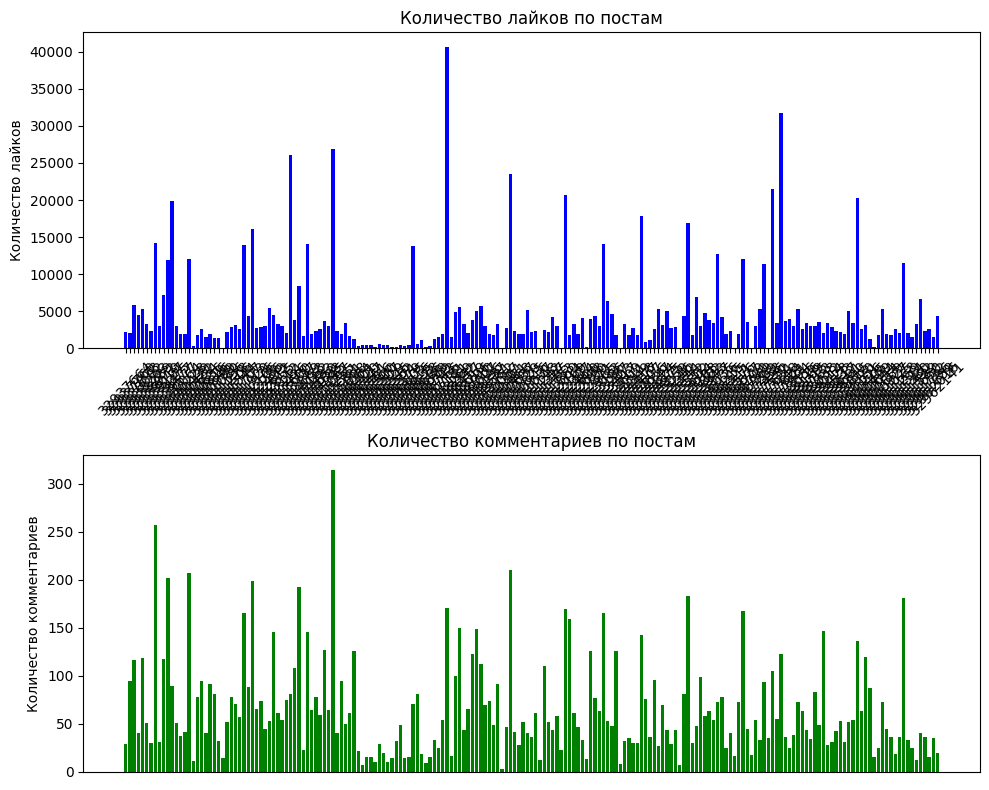

In [59]:
import matplotlib.pyplot as plt

# Ваш словарь с айди постами, количеством лайков и комментариев


# Извлекаем данные для построения гистограмм
post_ids = list(likes_comments_stat.keys())
likes = [likes_comments_stat[post_id]['likes'] for post_id in post_ids]
comments = [likes_comments_stat[post_id]['comments'] for post_id in post_ids]

# Создаем два графика
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Гистограмма для лайков
axs[0].bar(post_ids, likes, color='blue')
axs[0].set_title('Количество лайков по постам')
axs[0].set_ylabel('Количество лайков')
plt.xticks([])
# Гистограмма для комментариев
axs[1].bar(post_ids, comments, color='green')
axs[1].set_title('Количество комментариев по постам')
axs[1].set_ylabel('Количество комментариев')

# Размещаем графики на оси X
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.xticks([])
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)
plt.xticks([])
# Отображаем графики
plt.tight_layout()
plt.show()

In [65]:
df = pd.DataFrame.from_dict(post_data, orient='index')

# Выводим DataFrame до сортировки
print(df.describe())

DataFrame до сортировки:
          likes  comments
32937664   2209        29
32937760   2031        94
32937878   5789       116
32938082   4503        40
32938203   5276       118
...         ...       ...
32961732   6717        40
32961796   2350        36
32961859   2566        15
32962016   1552        35
32962141   4413        19

[193 rows x 2 columns]
              likes    comments
count    193.000000  193.000000
mean    4501.134715   66.585492
std     5916.381225   51.711783
min       30.000000    3.000000
25%     1842.000000   32.000000
50%     2800.000000   52.000000
75%     4358.000000   83.000000
max    40570.000000  314.000000


In [68]:
unic_users={}
most_likers={}
for j_name in list_files_and_folders("vake/-28905875")[1]:
    with open(x + j_name, 'r') as fl:
        jsn = json.load(fl)
        for uuser in jsn['likes']:
            unic_users[uuser['id']]=uuser
            most_likers[uuser['id']]=most_likers.get(uuser['id'],0)+1
print('Finish!')
print(len(unic_users))
print(len(most_likers))

Finish!
253081
253081


In [72]:
df_user_likes = pd.DataFrame(list(most_likers.items()), columns=['vk_id', 'count_likes'])

vk_id    count_likes
count  2.530810e+05  253081.000000
mean   3.750785e+08       3.432573
std    1.904721e+08       6.489226
min    6.055000e+03       1.000000
25%    2.194049e+08       1.000000
50%    3.599754e+08       1.000000
75%    5.248533e+08       3.000000
max    8.392823e+08     205.000000

In [79]:
def zodiac_sign(day, month):
    day,month=int(day),int(month)
    if (month == 3 and day >= 21) or (month == 4 and day <= 19):
        return "Овен"
    elif (month == 4 and day >= 20) or (month == 5 and day <= 20):
        return "Телец"
    elif (month == 5 and day >= 21) or (month == 6 and day <= 20):
        return "Близнецы"
    elif (month == 6 and day >= 21) or (month == 7 and day <= 22):
        return "Рак"
    elif (month == 7 and day >= 23) or (month == 8 and day <= 22):
        return "Лев"
    elif (month == 8 and day >= 23) or (month == 9 and day <= 22):
        return "Дева"
    elif (month == 9 and day >= 23) or (month == 10 and day <= 22):
        return "Весы"
    elif (month == 10 and day >= 23) or (month == 11 and day <= 21):
        return "Скорпион"
    elif (month == 11 and day >= 22) or (month == 12 and day <= 21):
        return "Стрелец"
    elif (month == 12 and day >= 22) or (month == 1 and day <= 19):
        return "Козерог"
    elif (month == 1 and day >= 20) or (month == 2 and day <= 18):
        return "Водолей"
    else:
        return "Рыбы"


stat_zodiacs={"unknown":0}
stat_city={}
names_city={}
mean_age=[]
for elem in unic_users:
    uuser=unic_users[elem]
    if "bdate" in uuser.keys():
        nm=uuser['bdate'].split('.')
        zdc=zodiac_sign(nm[0],nm[1])
        stat_zodiacs[zdc]=stat_zodiacs.get(zdc,0)+1
        if len(nm)>2:
            mean_age.append(2023-int(nm[-1]))
    else:
        stat_zodiacs["unknown"]+=1

    if "city" in uuser.keys():
        names_city[uuser['city']['id']]=uuser['city']['title']
        stat_city[uuser['city']['id']]=stat_city.get(uuser['city']['id'],0)+1

#print(stat_city)
print(stat_zodiacs)
print("Средний возраст",sum(mean_age)/len(mean_age),"Известно:",len(mean_age))
#names_city


{'unknown': 63722, 'Козерог': 14938, 'Близнецы': 16718, 'Скорпион': 14725, 'Телец': 15556, 'Лев': 16919, 'Дева': 16140, 'Стрелец': 15178, 'Овен': 15037, 'Рыбы': 15495, 'Рак': 17394, 'Водолей': 15740, 'Весы': 15519}
Средний возраст 25.77694495188233 Известно: 106198


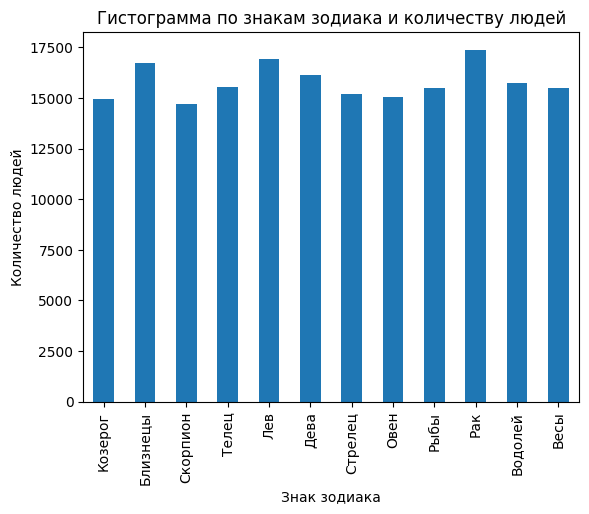

In [87]:
# Преобразование словаря в DataFrame
df = pd.DataFrame(list([(x,y) for x,y in stat_zodiacs.items() if x!="unknown"]), columns=['Знак зодиака', 'Количество людей'])

# Построение гистограммы
df.plot(kind='bar', x='Знак зодиака', y='Количество людей', legend=False)
plt.title('Гистограмма по знакам зодиака и количеству людей')
plt.xlabel('Знак зодиака')
plt.ylabel('Количество людей')
plt.show()

[(14, 814), (15, 2271), (16, 4347), (17, 6372), (18, 9859), (19, 11939), (20, 11400), (21, 11036), (22, 9078), (23, 10840), (24, 5714), (25, 3728), (26, 2559), (27, 1874), (28, 1503), (29, 1038), (30, 814), (31, 653), (32, 677), (33, 767), (34, 417), (35, 419), (36, 304), (37, 283), (38, 283), (39, 223), (40, 182), (41, 168), (42, 153), (43, 195), (44, 113), (45, 110), (46, 127), (47, 89), (48, 102), (49, 82), (50, 88), (51, 73), (52, 75), (53, 92), (54, 104), (55, 51), (56, 70), (57, 61), (58, 49), (59, 54), (60, 42), (61, 50), (62, 53), (63, 75), (64, 47), (65, 54), (66, 46), (67, 37), (68, 46), (69, 36), (70, 28), (71, 34), (72, 29), (73, 71), (74, 21), (75, 17), (76, 14), (77, 16), (78, 114), (79, 15), (80, 16), (81, 17), (82, 72), (83, 33), (84, 36), (85, 9), (86, 15), (87, 16), (88, 17), (89, 19), (90, 14), (91, 8), (92, 14), (93, 49), (94, 11), (95, 17), (96, 21), (97, 11), (98, 32), (99, 33), (100, 74), (101, 89), (102, 60), (103, 96), (104, 121), (105, 53), (106, 115), (107, 3

C:\Users\user\AppData\Local\Temp\ipykernel_15616\3567868632.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('Возрастовой интервал', as_index=False)['Количество людей'].sum()


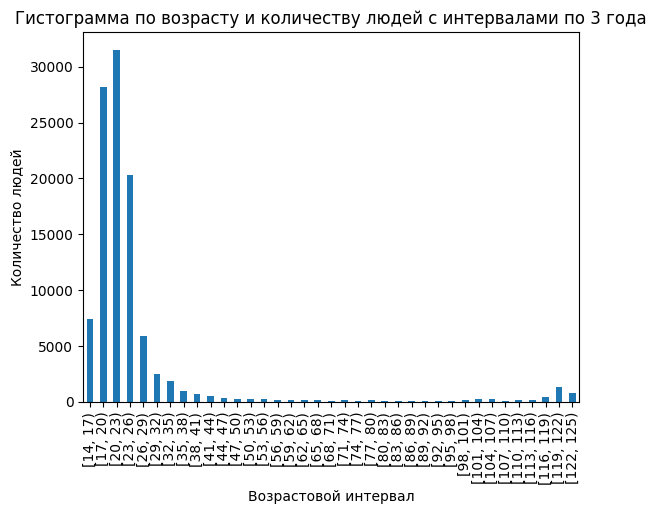

In [85]:
# Преобразование словаря в DataFrame

srt_dates=sorted(collections.Counter(mean_age).items(),key=lambda x:x[0])
print(srt_dates)
df = pd.DataFrame(srt_dates, columns=['Возраст', 'Количество людей'])

# Создаем интервалы по 3 года
bins = list(range(df['Возраст'].min(), df['Возраст'].max() + 4, 3))

# Группируем данные по интервалам и суммируем количество людей в каждом интервале
df['Возрастовой интервал'] = pd.cut(df['Возраст'], bins=bins, right=False)
grouped_df = df.groupby('Возрастовой интервал', as_index=False)['Количество людей'].sum()

# Построение гистограммы
grouped_df.plot(kind='bar', x='Возрастовой интервал', y='Количество людей', legend=False)
plt.title('Гистограмма по возрасту и количеству людей с интервалами по 3 года')
plt.xlabel('Возрастовой интервал')
plt.ylabel('Количество людей')
plt.show()

In [89]:
len(stat_city)

5372

In [91]:
srt_city=dict(sorted(stat_city.items(),key=lambda x:-x[1]))
for i in list(srt_city)[:100]:
    print(names_city[i],srt_city[i])


Москва 15629
Санкт-Петербург 8747
Екатеринбург 2803
Ростов-на-Дону 2543
Краснодар 2508
Новосибирск 2178
Нижний Новгород 2018
Воронеж 1913
Челябинск 1852
Самара 1736
Пермь 1584
Красноярск 1556
Волгоград 1494
Омск 1371
Уфа 1331
Казань 1280
Тюмень 1280
Иркутск 1189
Саратов 1178
Владивосток 1063
Калининград 995
Los Angeles 905
Ярославль 904
Хабаровск 891
Томск 855
Барнаул 854
Пенза 839
Брянск 806
Тула 775
Минск 774
Оренбург 746
Киров 719
Белгород 712
Ижевск 697
Рязань 691
Симферополь 678
Курск 668
Кемерово 656
Тверь 644
Ставрополь 589
Астрахань 584
Владимир 583
Чита 570
Тольятти 562
Смоленск 561
Калуга 550
Ульяновск 522
Сочи 513
Липецк 508
Орёл 507
Иваново 505
New York City 494
Новокузнецк 491
Мурманск 489
Улан-Удэ 474
Tokyo 470
Магнитогорск 464
Тамбов 459
Саранск 434
Вологда 432
Севастополь 431
Архангельск 418
Сыктывкар 412
Петрозаводск 396
Сургут 391
Кострома 384
Благовещенск 360
Чебоксары 342
Курган 335
Нижний Тагил 322
Chicago 319
Псков 311
Череповец 308
Новороссийск 285
Набережные Чел